# Mini Proyecto 2 
Para este mini proyecto volveremos a usar el set de datos de jugadores de SC2 visto en el proyecto anterior,
considerando dos tipos de problemas:
## Binario
LeagueIndex 1-5 seran considerados como clase 1

LeagueIndex 6-8 seran considerados como clase 2
## Terciario
LeagueIndex 1-3 seran considerados como clase 1

LeagueIndex 4-6 seran considerados como clase 2

LeagueIndex 7 y 8 seran considerados como clase 3

In [2]:
import csv
import pandas as pd
from matplotlib import pyplot as pl
import numpy as np
from numpy.linalg import inv
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

new_table = pd.read_csv("SkillCraft1_Dataset.csv")
header = list(new_table)
NaN_index = [] 
for h in header:
    c = 0
    for n in new_table[h]:
        if n == '?':
            new_table.drop(new_table.index[c],inplace=True)
            continue
        c = c + 1
#Mostramos la tabla generada
#new_table['Index'] = [x for x in range(len(y))]
new_table.reset_index(drop=False,inplace=True)
new_table[0:5]

,index,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,...,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,...,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,...,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,2,56,4,30,10,200,69.9612,0.001101,0.000336,4,...,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,3,57,3,19,20,400,107.6016,0.001034,0.000213,1,...,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,4,58,3,32,10,500,122.8908,0.001136,0.000327,2,...,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [4]:
Binario = []
Terciario = []
class_1_binario = [1,2,3,4,5]
class_1_terciario = [1,2,3]
class_2_terciario = [4,5,6]
for i in new_table["LeagueIndex"]:
    if i in class_1_binario:
        Binario.append(1)
    else: 
        Binario.append(2)
    if i in class_1_terciario:
        Terciario.append(1)
    elif i in class_2_terciario:
        Terciario.append(2)
    else:
        Terciario.append(3)

#x_axis_binario = np.arange(len(Binario))
#x_axis_terciario = np.arange(len(Terciario))
#pl.figure(1)
#pl.plot(x_axis_binario,Terciario,'*')
#pl.axis([0, 100, 0, 20])

In [6]:
new_table["Binary_Class"] = Binario
new_table["Tertiary_Class"] = Terciario
new_table[0:5]

,index,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,...,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,Binary_Class,Tertiary_Class
0,0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,...,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000,1,2
1,1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,...,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208,1,2
2,2,56,4,30,10,200,69.9612,0.001101,0.000336,4,...,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189,1,2
3,3,57,3,19,20,400,107.6016,0.001034,0.000213,1,...,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384,1,1
4,4,58,3,32,10,500,122.8908,0.001136,0.000327,2,...,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019,1,1


In [7]:
y = new_table['Binary_Class']
X = ['APM','TotalHours','UniqueHotkeys','NumberOfPACs','ActionsInPAC','TotalMapExplored','WorkersMade','HoursPerWeek','SelectByHotkeys']
#X = [i for i in new_table.columns[3:-1]]

phi = np.zeros((len(y),len(X)+1))
phi[:,0] = np.ones(len(y))
for i,x in enumerate(X):
    phi[:,i+1] = np.asarray(new_table[x]) 
#phi[:,6] = phi[:,6]*(-1)
phi_t = phi.T
t = np.zeros((len(y),1))
t[:,0] = y
multiplicate_phi = np.dot(phi_t,phi)
inverse_of_phi = inv(multiplicate_phi)
phi_final = np.dot(inverse_of_phi,phi_t)
w = np.dot(phi_final,t)

In [13]:
Y_result1 = []
for i in range(len(y)):
    y_predict = w[0]
    for j,x in enumerate(X):
            y_predict = y_predict + w[j+1]*float(new_table[x][i]) 
    Y_result1.append(y_predict)
beta = mean_squared_error(y,Y_result1)
x_label = range(0,len(y))
plane = np.array([[0, len(x_label)],[1.5, 1.5]])
print('MSE:',beta)
x_label = np.asarray([range(0,len(y)),range(0,len(y))])
Y_result1 = [float(i) for i in Y_result1]
Y_result1 = np.asarray(Y_result1).T
Y_result1 = np.asarray([Y_result1,Y_result1])

MSE: 0.11407825942849177


(3338, 3338)


<Figure size 432x288 with 0 Axes>

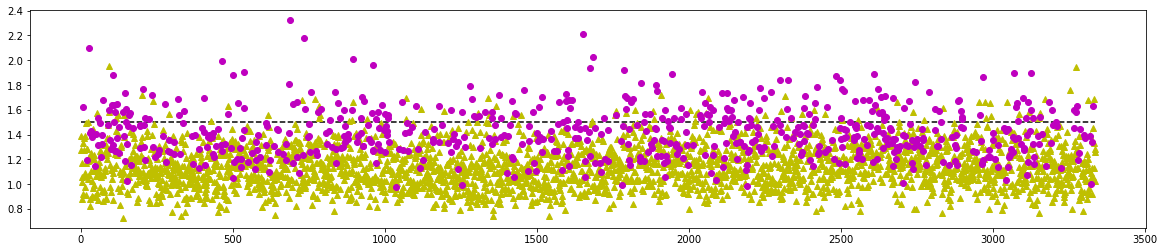

In [31]:
h = (4/3338)  # step size in the mesh
xx, yy = np.meshgrid(np.arange(0,4, h),
                     np.arange(0, 4, h))
print(xx.shape)
y_predic_binario = [Binario for i in range(3338)]
#print(y_predic_binario[0])
pl.clf()
pl.figure(figsize =(20,4))
pl.plot(plane[0],plane[1],"k--")
pl.plot(x_label[0][new_table['Binary_Class'] == 1],Y_result1[0][new_table['Binary_Class'] == 1],'y^',label='ML')
pl.plot(x_label[1][new_table['Binary_Class'] == 2],Y_result1[1][new_table['Binary_Class'] == 2],'mo',label='ML')
#pl.contourf(yy,xx,y_predic_binario, alpha=0.8)
#pl.axis([0,8,0,3])